In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

In [2]:
# Funcion de activacion 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
# Inicializacion de los parametros 
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
    }
    return parameters


In [4]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "A1": A1,
        "A2": A2
    }
    return A2, cache

In [5]:
# Funcion de perdida
def loss_function(A2, Y):
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    cost = np.squeeze(cost)

    return cost

In [6]:
def loss_function_mse(A2, Y):
    m = Y.shape[1]  # Número de ejemplos
    diff = A2 - Y  # Diferencia entre predicciones y valores reales
    squared_diff = np.square(diff)  # Eleva al cuadrado cada diferencia
    mse = np.mean(squared_diff)  # Calcula el promedio de los valores al cuadrado
    return mse

In [7]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

In [8]:
def backward_prop_mse(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    # Derivada de la pérdida MSE con respecto a A2
    dZ2 = 2 * (A2 - Y) / m
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

In [9]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
    }

    return new_parameters

In [10]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = loss_function(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if(i%100 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters

In [11]:
def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    if(yhat >= 0.5):
        y_predict = 1
    else:
        y_predict = 0

    return y_predict

In [12]:
np.random.seed(2)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y = np.array([[0, 1, 1, 0]])

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 2     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.3

trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

# Test 2X1 vector to calculate the XOR of its elements. 
# Try (0, 0), (0, 1), (1, 0), (1, 1)
X_test = np.array([[1], [1]])

print(trained_parameters)

y_predict = predict(X_test, trained_parameters)

print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
    X_test[0][0], X_test[1][0], y_predict))

Cost after iteration# 0: 1.052558
Cost after iteration# 100: 0.695402
Cost after iteration# 200: 0.693668
Cost after iteration# 300: 0.693206
Cost after iteration# 400: 0.692966
Cost after iteration# 500: 0.692779
Cost after iteration# 600: 0.692587
Cost after iteration# 700: 0.692352
Cost after iteration# 800: 0.692030
Cost after iteration# 900: 0.691539
Cost after iteration# 1000: 0.690679
{'W1': array([[-0.59247105, -0.47282144],
       [-2.06763357, -0.23592616]]), 'W2': array([[-0.43995116, -0.16049007]]), 'b1': array([[-1.50109455],
       [-1.77729809]]), 'b2': array([[-0.56827845]])}
Neural Network prediction for example (1, 1) is 1


In [13]:
def initialize_parameters_zeros(n_x, n_h, n_y):
    W1 = np.zeros((n_h, n_x))
    b1 = np.zeros((n_h, 1))
    W2 = np.zeros((n_y, n_h))
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return parameters

# Probar inicialización en 0
parameters_zeros = initialize_parameters_zeros(n_x, n_h, n_y)
trained_parameters_zeros = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)


Cost after iteration# 0: 1.013592
Cost after iteration# 100: 0.590854
Cost after iteration# 200: 0.525336
Cost after iteration# 300: 0.464032
Cost after iteration# 400: 0.132533
Cost after iteration# 500: 0.062978
Cost after iteration# 600: 0.040478
Cost after iteration# 700: 0.029604
Cost after iteration# 800: 0.023256
Cost after iteration# 900: 0.019114
Cost after iteration# 1000: 0.016207


In [14]:
# Comparar la convergencia
print("Parámetros entrenados con inicialización en 0:")
print(trained_parameters_zeros)
print("\nParámetros entrenados con inicialización aleatoria:")
print(trained_parameters)


Parámetros entrenados con inicialización en 0:
{'W1': array([[-2.92684964,  3.09007586],
       [ 3.65689327, -3.64943032]]), 'W2': array([[-4.72800176, -4.657755  ]]), 'b1': array([[1.37578737],
       [1.80261412]]), 'b2': array([[4.16176135]])}

Parámetros entrenados con inicialización aleatoria:
{'W1': array([[-0.59247105, -0.47282144],
       [-2.06763357, -0.23592616]]), 'W2': array([[-0.43995116, -0.16049007]]), 'b1': array([[-1.50109455],
       [-1.77729809]]), 'b2': array([[-0.56827845]])}


In [15]:
import matplotlib.pyplot as plt

def model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate, cost_function, backward_prop = backward_prop):
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []

    for i in range(0, num_of_iters + 1):
        a2, cache = forward_prop(X, parameters)
        
        cost = cost_function(a2, Y)
        costs.append(cost)
        
        grads = backward_prop(X, Y, cache, parameters)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print(f'Cost after iteration# {i}: {cost}')
    
    return parameters, costs


Entrenando con learning rate = 0.01
Cost after iteration# 0: 0.7138661657957408
Cost after iteration# 100: 0.7013407397261048
Cost after iteration# 200: 0.6960972715965046
Cost after iteration# 300: 0.6937558759018435
Cost after iteration# 400: 0.6925569470116966
Cost after iteration# 500: 0.6918089880061365
Cost after iteration# 600: 0.6912420356221645
Cost after iteration# 700: 0.6907501329161762
Cost after iteration# 800: 0.6902907751621409
Cost after iteration# 900: 0.6898459797494001
Cost after iteration# 1000: 0.689407254139871

Entrenando con learning rate = 0.1
Cost after iteration# 0: 0.8140596992628906
Cost after iteration# 100: 0.637562280104843
Cost after iteration# 200: 0.6022635684933371
Cost after iteration# 300: 0.5774949046395388
Cost after iteration# 400: 0.5592778651416046
Cost after iteration# 500: 0.5456979806681578
Cost after iteration# 600: 0.535411292386223
Cost after iteration# 700: 0.5274604470046982
Cost after iteration# 800: 0.521180478841919
Cost after ite

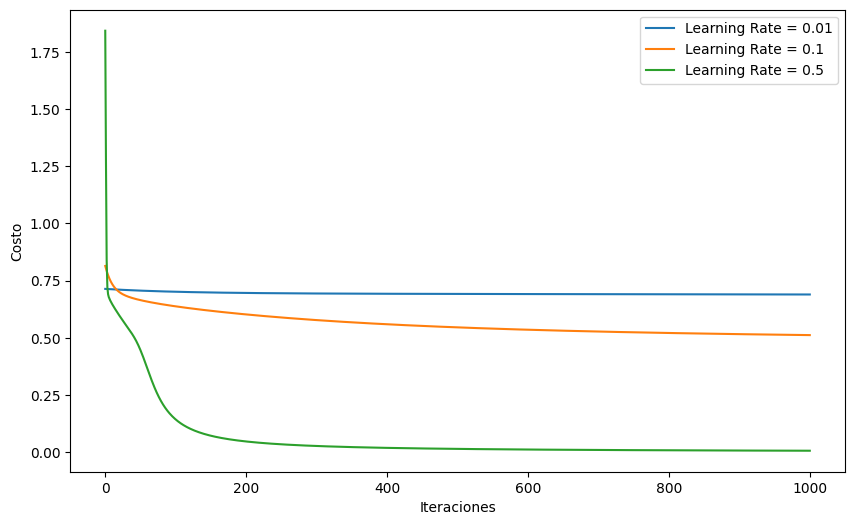

In [16]:
# Definir diferentes learning rates
learning_rates = [0.01, 0.1, 0.5]
costs_dict = {}

for lr in learning_rates:
    print(f"\nEntrenando con learning rate = {lr}")
    _, costs = model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, lr, loss_function)
    costs_dict[lr] = costs

# Graficar costos
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs_dict[lr], label=f'Learning Rate = {lr}')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.show()



Entrenando con learning rate = 0.01
Cost after iteration# 0: 0.2545457301296162
Cost after iteration# 100: 0.24933723732244986
Cost after iteration# 200: 0.24749214041274345
Cost after iteration# 300: 0.2462873594856582
Cost after iteration# 400: 0.24506562934271003
Cost after iteration# 500: 0.24361579699622446
Cost after iteration# 600: 0.24181450692964998
Cost after iteration# 700: 0.2395399376394876
Cost after iteration# 800: 0.23664759380375372
Cost after iteration# 900: 0.2329621607392008
Cost after iteration# 1000: 0.2282773277308189

Entrenando con learning rate = 0.1
Cost after iteration# 0: 0.26169880180635346
Cost after iteration# 100: 0.2481524581619403
Cost after iteration# 200: 0.22829187197196402
Cost after iteration# 300: 0.18937233139025092
Cost after iteration# 400: 0.16218415833903804
Cost after iteration# 500: 0.14107431058324063
Cost after iteration# 600: 0.13405791757122212
Cost after iteration# 700: 0.13116150684464845
Cost after iteration# 800: 0.12962954443482

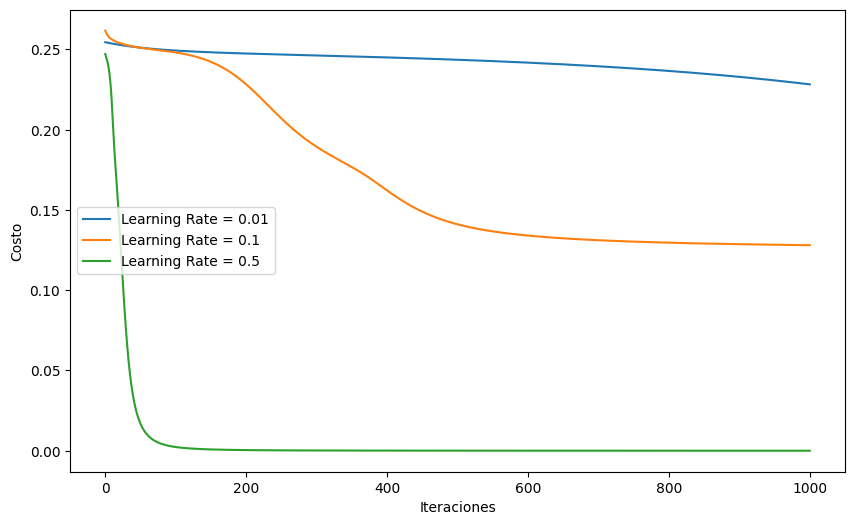

In [17]:
# Definir diferentes learning rates
learning_rates = [0.01, 0.1, 0.5]
costs_dict = {}

for lr in learning_rates:
    print(f"\nEntrenando con learning rate = {lr}")
    _, costs = model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, lr, loss_function_mse, backward_prop_mse)
    costs_dict[lr] = costs

# Graficar costos
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs_dict[lr], label=f'Learning Rate = {lr}')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.show()
